In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, skew, kurtosis

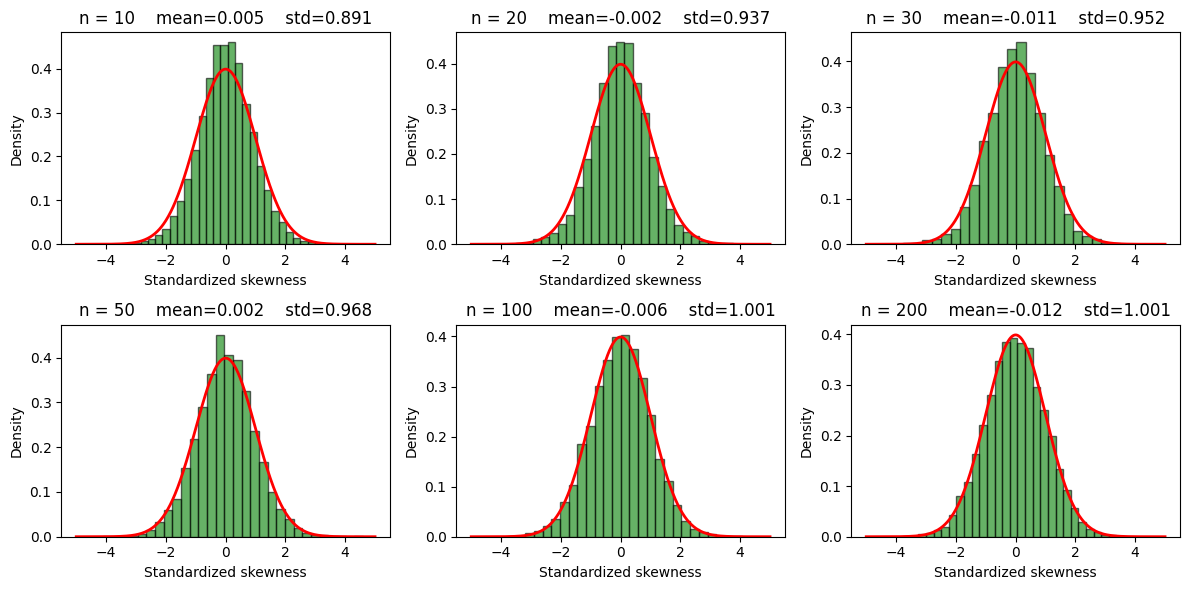

In [3]:
# repeat the experiment for n = 10, 20, 30, 50 and plot results
ns = [10, 20, 30, 50, 100, 200]
N = 10000  # number of repetitions
mu, sigma = 0, 1  # parameters of the normal distribution
xx = np.linspace(-5, 5, 1000)

fig, axs = plt.subplots(2, 3, figsize=(12, 6))
axs = axs.flatten()

for ax, n in zip(axs, ns):
    # generate samples and compute standardized skewness
    X = norm.rvs(loc=mu, scale=sigma, size=(N, n))
    s_vals = np.sqrt(n / 6) * skew(X, axis=1, bias=False)

    # histogram + normal PDF
    ax.hist(s_vals, bins=30, density=True, alpha=0.6, color='g', edgecolor='k')
    ax.plot(xx, norm.pdf(xx), 'r', linewidth=2)

    # annotations
    ax.set_title(f'n = {n}    mean={s_vals.mean():.3f}    std={s_vals.std(ddof=1):.3f}')
    ax.set_xlabel('Standardized skewness')
    ax.set_ylabel('Density')

plt.tight_layout()
plt.show()

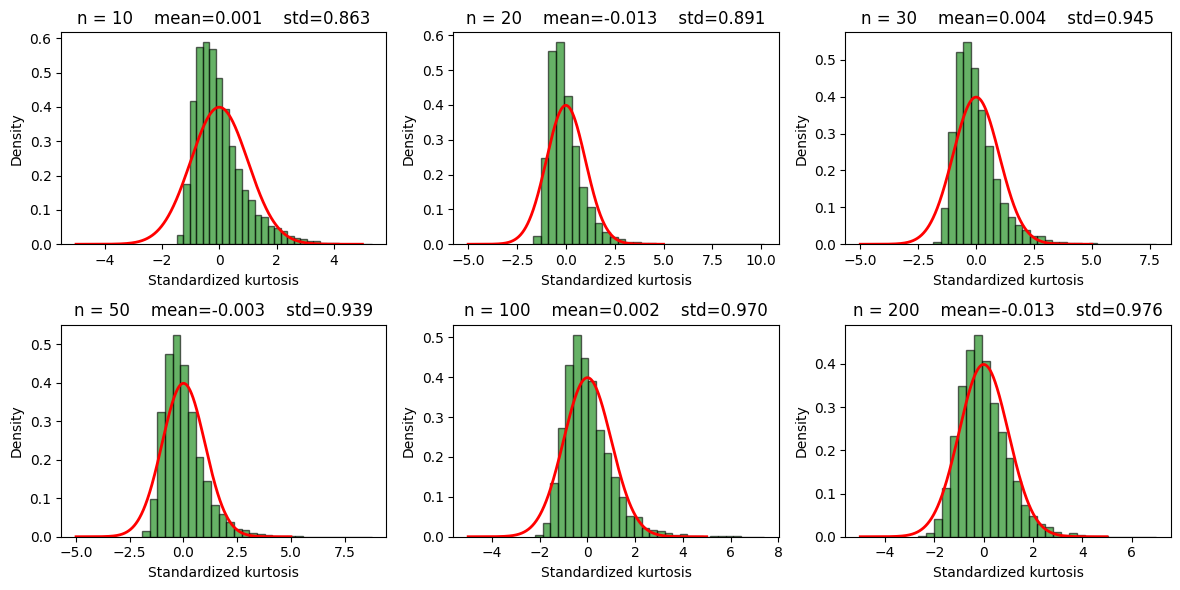

In [ ]:
# repeat the experiment for n = 10, 20, 30, 50 and plot results
ns = [10, 20, 30, 50, 100, 200]
N = 10000  # number of repetitions
mu, sigma = 0, 1  # parameters of the normal distribution
xx = np.linspace(-5, 5, 1000)

fig, axs = plt.subplots(2, 3, figsize=(12, 6))
axs = axs.flatten()

for ax, n in zip(axs, ns):
    # generate samples and compute standardized kurtosis
    X = norm.rvs(loc=mu, scale=sigma, size=(N, n))
    k_vals = np.sqrt(n / 24) * kurtosis(X, axis=1, bias=False, \
                                        fisher=True)

    # histogram + normal PDF
    ax.hist(k_vals, bins=30, density=True, alpha=0.6, color='g', edgecolor='k')
    ax.plot(xx, norm.pdf(xx), 'r', linewidth=2)

    # annotations
    ax.set_title(f'n = {n}    mean={k_vals.mean():.3f}    std={k_vals.std(ddof=1):.3f}')
    ax.set_xlabel('Standardized kurtosis')
    ax.set_ylabel('Density')

plt.tight_layout()
plt.show()